In [1]:
import ast

# Input string
input_string = "[{'HumanMessage': {'content': 'hi'}, 'AIMessage': {'content': 'Echo: ไม่เป็นไรค่ะ มีอะไรให้ช่วยไหมค่ะ?'}}]"

# Convert the string to a list
output_list = ast.literal_eval(input_string)

print(output_list)
print(type(output_list))


[{'HumanMessage': {'content': 'hi'}, 'AIMessage': {'content': 'Echo: ไม่เป็นไรค่ะ มีอะไรให้ช่วยไหมค่ะ?'}}]
<class 'list'>


In [4]:
import json

# Step 1: Parse the JSON string to a Python list of dictionaries
try:
    latestMemory = json.loads(latestMemory_string)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    latestMemory = []

# Step 2: Extract and print the content as "Human: text" and "AI: text"
for message in latestMemory:
    try:
        human_content = message["HumanMessage"]["content"]
        ai_content = message["AIMessage"]["content"]
        print(f"Human: {human_content}")
        print(f"AI: {ai_content}")
    except KeyError as e:
        print(f"Missing expected key: {e}")
    except TypeError as e:
        print(f"Unexpected data format: {e}")


Human: ฉันชื่อต่อ คุณช่วยอะไรได้บ้าง?
AI: Document ไม่มีข้อมูลที่เกี่ยวข้องกับคำถาม ค่ะ
Human: สวัสดี ฉันชื่อต่อ ต้องการเดินทางไป ฮ่องกง มาเก๊า เซินเจิ้น ต้องเลือกปลายทาง(Destination)เป็นอะไร


AI: Sompo จะให้ระบุชื่อประเทศที่ไปได้ทั้งหมดเลยค่ะ (สูงสุดได้ 5 ประเทศ)
หมายเหตุ ::  ตัวอย่างคือ Hongkong, Macau เบี้ยจะเป็นเบี้ย ASIA แต่หากลูกค้าระบุ Hongkong, Macau และ America เบี้ยประกันจะถูกปรับเป็นแผน Worldwide ทันที เพราะมีอเมริกาโผล่มาค่ะ


In [5]:
import torch

In [6]:
torch.__version__

'2.3.0'

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
x = torch.rand(5, 3).to(device)

In [9]:
x

tensor([[0.7335, 0.8851, 0.3199],
        [0.3522, 0.3072, 0.8700],
        [0.7151, 0.3236, 0.1206],
        [0.0604, 0.6196, 0.3325],
        [0.3788, 0.1052, 0.1116]], device='cuda:0')

# K-Means

In [10]:
import matplotlib.pyplot as plt

In [11]:
N = 100
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])

In [12]:
X = torch.cat([x1, x2, x3], dim=0)
print(X.shape)

torch.Size([300, 2])


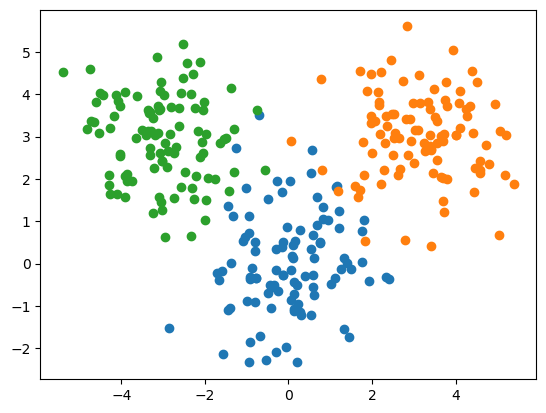

In [13]:
for i in range(3):
    plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
plt.show()

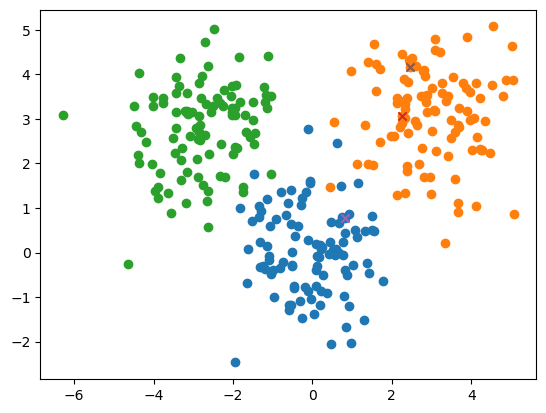

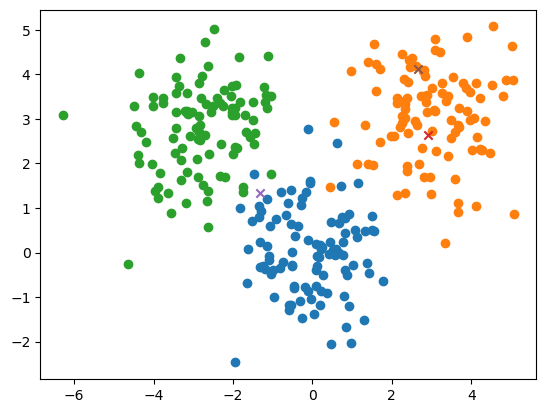

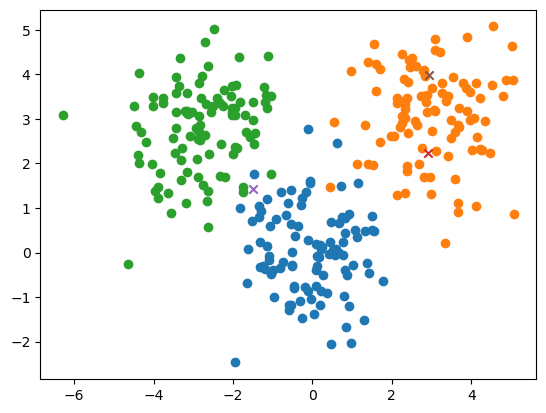

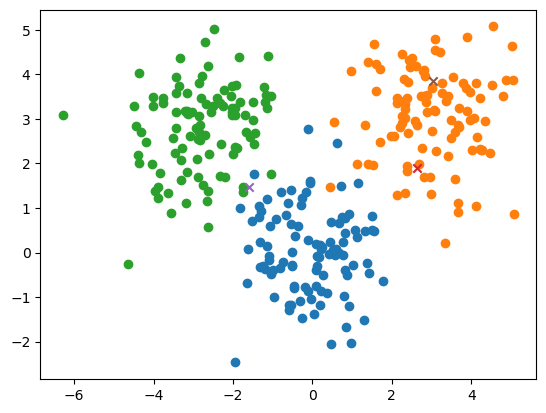

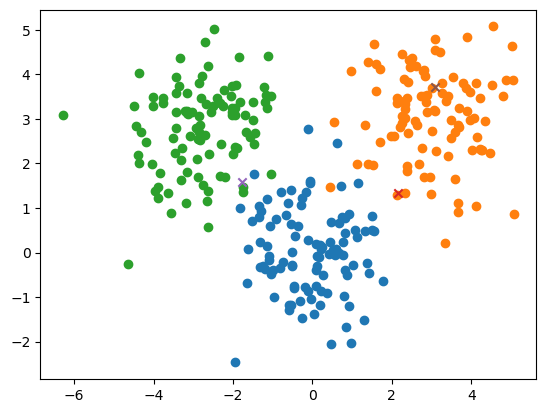

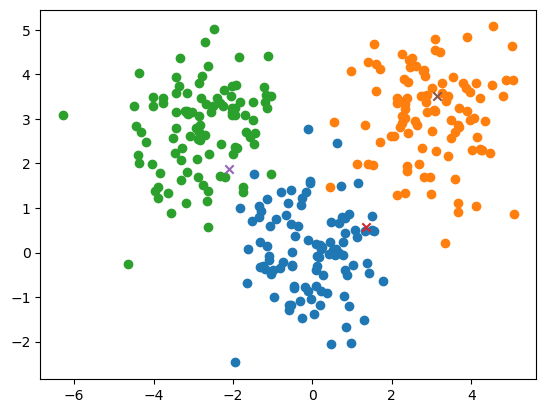

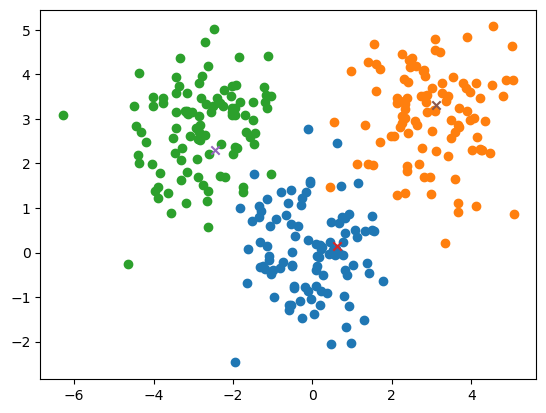

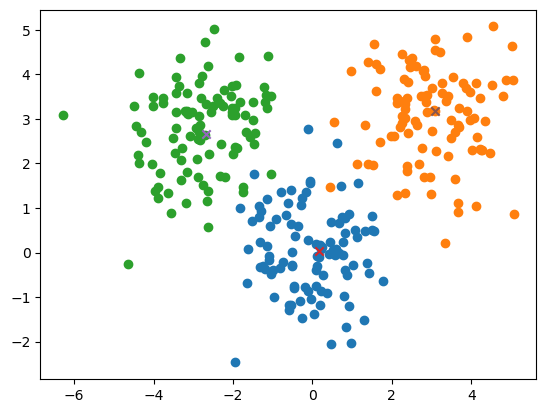

In [40]:
K = 3
centroids = X[torch.randperm(len(X))[:K]]
while True:
    D = torch.cdist(X, centroids)
    clusters = torch.argmin(D, dim=1)
    for i in range(3):
        plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
    old_centroids = centroids.clone()
    for k in range(K):
        plt.scatter(centroids[k, 0], centroids[k, 1], marker='x')
        centroids[k] = X[clusters == k].mean(dim=0)
    change = torch.sum((centroids - old_centroids) ** 2)
    if change < 0.1:
        break
    plt.show()

In [15]:
import time
device = 'cuda'

N = 100000
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])
X = torch.cat([x1, x2, x3], dim=0).to(device)

t1 = time.time()
K = 3
centroids = X[torch.randperm(len(X))[:K]]
for _ in range(100):
    D = torch.cdist(X, centroids)
    clusters = torch.argmin(D, dim=1)
    for k in range(K):
        centroids[k] = X[clusters == k].mean(dim=0)
print(time.time() - t1)

5.993324041366577


# Auto differentiation

In [62]:
x = torch.tensor(3., requires_grad=True)
y = x**2 + 2*x + 1 
# y' = 2x + 2
y.backward()

In [65]:
x.grad # 2(3) + 2

tensor(8.)

# Regression

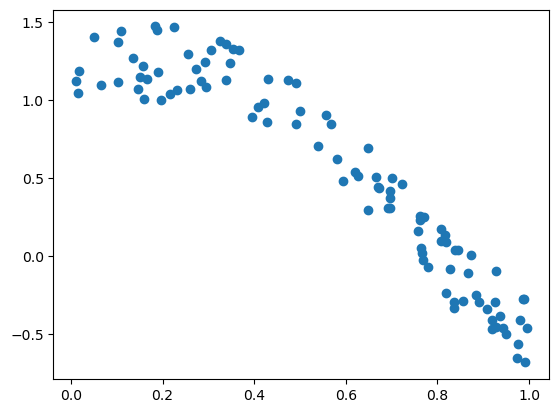

In [66]:
N = 100
x = torch.rand(N, 1)
y = torch.sin(3 * x + 1) + 0.5 * torch.rand(N, 1)
plt.scatter(x, y)

In [68]:
ones = torch.ones(N, 1)
X = torch.cat([x, ones], dim=1)

In [74]:
R = torch.inverse(X.T @ X) @ X.T @ y

In [76]:
x_ = torch.linspace(0, 1, 100).reshape(-1, 1)

In [82]:
y_ = x_ * R[0] + R[1]

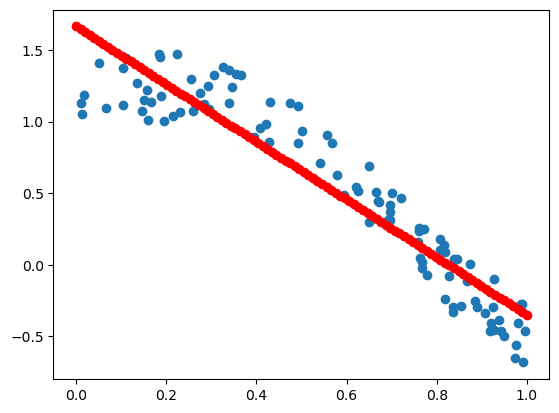

In [83]:
plt.scatter(x, y)
plt.scatter(x_, y_, color='r')
plt.show()

nonlinear

In [84]:
ones = torch.ones(N, 1)
X = torch.cat([x**2, x, ones], dim=1)

In [86]:
R = torch.inverse(X.T @ X) @ X.T @ y

In [88]:
y_ = x_**2 * R[0] + x_ * R[1] + R[2]

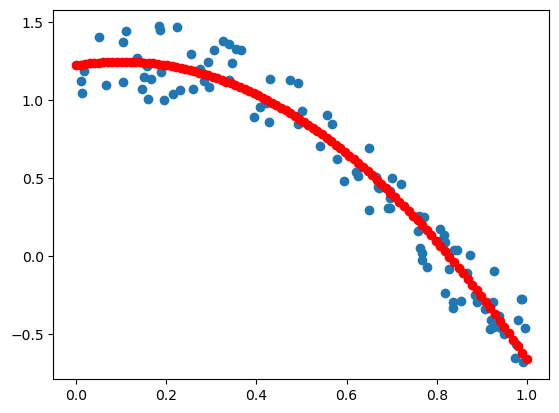

In [89]:
plt.scatter(x, y)
plt.scatter(x_, y_, color='r')
plt.show()

In [134]:
device = 'cpu'

N = 100000000
x = torch.rand(N, 1).to(device)
y = torch.sin(3 * x + 1) + 0.5 * torch.rand(N, 1).to(device)

t1 = time.time()
degree = 1
ones = torch.ones(N, 1).to(device)
X = torch.cat([x, ones], dim=1)
for i in range(2, degree + 1):
    X = torch.cat([x**i, X], dim=1)
R = torch.inverse(X.T @ X) @ X.T @ y
print(time.time() - t1)

0.726722240447998


# MLP

In [135]:
from torch import nn

In [136]:
# [1] 32 16 [1]
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return self.fc3(x)

In [140]:
(1*32+32) + (32*16+16) + (16*1+1)

609

In [141]:
model = Regressor()

In [146]:
gen = iter(model.parameters())

In [152]:
next(gen).shape

torch.Size([1])

In [155]:
N = 1000
x = torch.rand(N, 1).to(device)
y = torch.sin(3 * x + 1) + 0.5 * torch.rand(N, 1).to(device)

In [174]:
device = 'cuda' 

model = model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()
for epoch in range(5000):
    y_ = model(x.to(device))
    loss = criterion(y_, y.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 0.021910324692726135
100: 0.02190151810646057
200: 0.021893003955483437
300: 0.02188478223979473
400: 0.021876834332942963
500: 0.021869158372282982
600: 0.021861745044589043
700: 0.02185457944869995
800: 0.02184765413403511
900: 0.02184097096323967
1000: 0.02183450758457184
1100: 0.021828267723321915
1200: 0.021822236478328705
1300: 0.021816406399011612
1400: 0.02181076817214489
1500: 0.02180532179772854
1600: 0.021800054237246513
1700: 0.021794956177473068
1800: 0.021790029481053352
1900: 0.021785257384181023
2000: 0.02178063616156578
2100: 0.021776162087917328
2200: 0.021771827712655067
2300: 0.0217676293104887
2400: 0.021763557568192482
2500: 0.021759605035185814
2600: 0.021755769848823547
2700: 0.021752052009105682
2800: 0.021748436614871025
2900: 0.021744923666119576
3000: 0.021741509437561035
3100: 0.02173818275332451
3200: 0.021734952926635742
3300: 0.021731801331043243
3400: 0.02172873169183731
3500: 0.021725740283727646
3600: 0.02172281965613365
3700: 0.021719971671700478


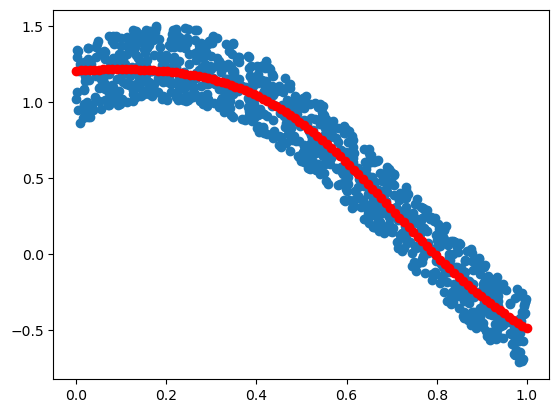

In [177]:
x_ = torch.linspace(0, 1, 100).reshape(-1, 1)
model.eval()
with torch.no_grad():
    y_ = model(x_.to(device))
plt.scatter(x, y)
plt.scatter(x_, y_.cpu(), color='r')
plt.show()

# Classification

In [182]:
N

100

In [181]:
X.shape

torch.Size([300, 2])

In [183]:
Y = torch.cat([torch.zeros(N), torch.ones(N), torch.ones(N) * 2]).long()

In [184]:
Y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [185]:
X.shape[1]

2

In [187]:
len(Y.unique())

3

In [188]:
# [2] 32 16 [3]
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 3)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [190]:
model = Classifier()

In [192]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()
for epoch in range(5000):
    y_ = model(X.to(device))
    loss = criterion(y_, Y.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 0.5961902141571045
100: 0.5957861542701721
200: 0.5953940749168396
300: 0.5950131416320801
400: 0.5946427583694458
500: 0.5942821502685547
600: 0.5939308404922485
700: 0.5935882925987244
800: 0.5932542681694031
900: 0.5929282307624817
1000: 0.592609703540802
1100: 0.5922985076904297
1200: 0.5919941067695618
1300: 0.5916964411735535
1400: 0.5914053916931152
1500: 0.591120183467865
1600: 0.5908411741256714
1700: 0.5905678272247314
1800: 0.5903000235557556
1900: 0.5900377631187439
2000: 0.5897807478904724
2100: 0.5895287990570068
2200: 0.5892817974090576
2300: 0.5890397429466248
2400: 0.5888022780418396
2500: 0.5885694622993469
2600: 0.5883411169052124
2700: 0.588117241859436
2800: 0.5878977179527283
2900: 0.5876822471618652
3000: 0.587471067905426
3100: 0.5872639417648315
3200: 0.587060809135437
3300: 0.5868615508079529
3400: 0.5866661071777344
3500: 0.5864744782447815
3600: 0.5862865447998047
3700: 0.586102306842804
3800: 0.5859214663505554
3900: 0.5857442617416382
4000: 0.5855706334

In [195]:
model.eval()
with torch.no_grad():
    y_ = model(X.to(device))
acc = torch.sum(Y == y_.argmax(dim=1).cpu()) / len(Y)
print(acc.item())

0.9733333587646484


In [2]:
from sklearn.datasets import load_iris
import numpy as np
df = load_iris(as_frame=True)

In [3]:
itrain = np.r_[0:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]
xtrain = df['data'].iloc[itrain].values
xtest = df['data'].iloc[itest].values
ytrain = df['target'].iloc[itrain].values
ytest = df['target'].iloc[itest].values

In [4]:
xtrain.shape

(75, 4)

In [4]:
len(np.unique(ytrain))

3

In [1]:
from torch import nn
import torch
m = nn.LogSigmoid()
input = torch.randn(2)
input

tensor([ 0.7902, -1.5192])

In [9]:

output = m(input)
output

tensor([-1.1776, -1.7592])

In [60]:
t = torch.rand(4, 4)
b = t.view(2, 8)
t.storage().data_ptr() == b.storage().data_ptr()  # `t` and `b` share the same underlying data.


True

In [64]:
b[0][0] = 3.14
t[0][0] # เปลี่ยนตาม

tensor(3.1400)

In [5]:
# [4] 128 [3]
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        return torch.softmax(self.fc3(x), dim=1)

In [6]:
xtrain_ = torch.tensor(xtrain, dtype=torch.float32)

In [7]:
xtest_ = torch.tensor(xtest, dtype=torch.float32)

In [8]:
ytrain_ = torch.tensor(ytrain, dtype=torch.long)

In [9]:
ytest_ = torch.tensor(ytest, dtype=torch.long)

In [10]:
model = Classifier()

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(2000):
    y_ = model(xtrain_.to(device))
    loss = criterion(y_, ytrain_.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.0968555212020874
500: 0.5515499114990234
1000: 0.5514682531356812
1500: 0.5514545440673828


In [12]:
model.eval()
with torch.no_grad():
    y_ = model(xtest_.to(device))
acc = torch.sum(ytest_ == y_.argmax(dim=1).cpu()) / len(y_)
print(acc.item())

0.9066666960716248


In [13]:
torch.save(model.state_dict(), 'model.pth') 

In [293]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 1.5635e-02,  9.3973e-01, -5.1401e-02, -1.8669e+00],
                      [-1.2709e-01,  9.8758e-01,  2.5959e-02, -1.5577e+00],
                      [ 1.9789e-02,  8.1291e-01, -1.0007e-01, -1.4440e+00],
                      [ 1.6696e-01, -4.8432e-01,  5.1615e-01,  1.0068e+00],
                      [-1.9540e-01, -3.9771e-02,  7.7054e-01,  1.3444e+00],
                      [ 1.8247e-01, -3.0524e-02,  3.4909e-01, -3.6004e-01],
                      [ 6.0604e-02, -3.5066e-01,  7.4853e-01,  1.8979e-01],
                      [-1.4475e-01, -2.3354e-01,  5.5877e-01,  8.0914e-01],
                      [-9.1416e-02, -4.5914e-01,  1.7087e-01,  1.0934e-01],
                      [-1.8097e-01,  1.9661e-01, -2.1704e-01,  1.1011e-01],
                      [-2.2164e-01, -1.6700e-01,  3.1598e-01,  1.4507e+00],
                      [-3.7634e-01,  4.4914e-01, -2.1666e-01,  8.8050e-03],
                      [-3.2349e-01, -5.4216e-02,  6.4399e-01

In [296]:
df['data'].columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [297]:
df['data'].max() # สำหรับ ทำ st.slider หรืออื่นๆ เพื่อดู scale ของค่าที่มีจาก data

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [298]:
import seaborn as sns

In [299]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [300]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [306]:
df = df.drop(columns=['class', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])

In [302]:
import pandas as pd

In [307]:
df = pd.get_dummies(df, dtype=float)

In [308]:
df

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,0,3,NaN,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [312]:
df = df.drop(columns=['sex_female'])

In [313]:
df

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,1,19.0,0,0,30.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,0,3,NaN,1,2,23.4500,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [315]:
df = df.dropna()

In [318]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [320]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0.0,0.0,1.0,0.0,0.0,0.0,1.0
886,2,27.0,0,0,13.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,19.0,0,0,30.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [321]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [322]:
from sklearn.model_selection import train_test_split

In [336]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [337]:
xtrain = torch.tensor(xtrain.values, dtype=torch.float32)
xtest = torch.tensor(xtest.values, dtype=torch.float32)
ytrain = torch.tensor(ytrain.values, dtype=torch.float32)
ytest = torch.tensor(ytest.values, dtype=torch.float32)
ytrain = ytrain.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)

In [327]:
xtrain.shape

torch.Size([571, 12])

In [328]:
ytrain.unique()

tensor([0, 1])

In [329]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(12, 128)
        self.fc2 = nn.Linear(128, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

In [330]:
model = Classifier()

In [334]:
ytrain.shape

torch.Size([571, 1])

In [338]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = model.to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(5000):
    y_ = model(xtrain.to(device))
    loss = criterion(y_, ytrain.to(device))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'{epoch}: {loss.item()}')

0: 1.9674535989761353
100: 0.40957778692245483
200: 0.38515743613243103
300: 0.3578585088253021
400: 0.3382408916950226
500: 0.32195284962654114
600: 0.30724281072616577
700: 0.2943097949028015
800: 0.29280877113342285
900: 0.27805888652801514
1000: 0.2985757887363434
1100: 0.2588392496109009
1200: 0.25733980536460876
1300: 0.25166189670562744
1400: 0.24589169025421143
1500: 0.234882652759552
1600: 0.2277156412601471
1700: 0.22147388756275177
1800: 0.22005273401737213
1900: 0.21301722526550293
2000: 0.21664689481258392
2100: 0.20287403464317322
2200: 0.6750779747962952
2300: 0.20300741493701935
2400: 0.19981348514556885
2500: 0.19683337211608887
2600: 0.19390550255775452
2700: 0.1919807493686676
2800: 0.18757756054401398
2900: 0.1858178824186325
3000: 0.18612076342105865
3100: 0.17776937782764435
3200: 0.18426689505577087
3300: 0.17941492795944214
3400: 0.1763719767332077
3500: 0.17378152906894684
3600: 0.17525672912597656
3700: 0.17131665349006653
3800: 0.16749726235866547
3900: 0.164

In [342]:
model.eval()
with torch.no_grad():
    y_ = model(xtest.to(device))
acc = torch.sum(ytest == y_.round().cpu()) / len(y_)
print(acc.item())

0.7832167744636536
